# 1. Load final_df3 csv

In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/final_df.csv')

In [172]:
df.head(2)

,image,stats,details,info,last_pulled,listing,price,area,num_images,state,address,bedrooms,bathrooms,estimate,status,city,zipcode
0,https://ssl.cdn-redfin.com/photo/81/mbpaddedwi...,"230 Tracewind Pl #16\nAtlanta, GA 30349\n$296,...",HOA Dues\n$17/month\nStories\n2 Stories\nPrope...,The Abigail I Plan built by Knight Homes in Wh...,2019-01-16 11:35:00,https://www.redfin.com/GA/Atlanta/230-Tracewin...,296311.0,3033.0,23,GA,230 Tracewind Pl #16,5.0,5.0,295725.0,New,Atlanta,30349
1,https://ssl.cdn-redfin.com/photo/107/mbpaddedw...,"2611 NE 20th Ave\nLighthouse Point, FL 33064\n...","Property Type\nSingle Family, Single\nCommunit...",Home shows very well and easy to show. Present...,2019-01-16 11:35:03,https://www.redfin.com/FL/Lighthouse-Point/261...,399000.0,1339.0,18,FL,2611 NE 20th Ave,3.0,2.0,393453.0,Active,Lighthouse Point,33064


In [173]:
df.shape

(18790, 17)

# load final dataframe and features

In [174]:
features = pd.read_csv('../data/features2.csv')
features.columns

Index(['fireplace', 'pool', 'gas_range', 'granite_marble', 'laminate',
       'hardwood_floors', 'central_air', 'washer_dryer', 'vaulted', 'patio',
       'deck', 'island', 'office', 'breakfast', 'basement', 'library',
       'walk_in', 'pantry', 'HOA', 'ceiling_fan', 'master_bedroom',
       'master_bathroom', 'suite', 'skylight', 'hot_tub', 'sauna', 'den',
       'MLS', 'view', 'balcony', 'carpet', 'attic', 'cellar', 'wine_cellar',
       'ocean_sea', 'garden', '2_car', '2_story', 'foyer', 'tennis_court',
       'basketball', 'tile', 'mold_trim'],
      dtype='object')

In [175]:
features.shape

(18790, 43)

## Join df and features

In [176]:
df = pd.concat([df,features], 1)

In [137]:
# from IPython.display import HTML

# HTML('''<script>
# code_show=true; 
# function code_toggle() {
#  if (code_show){
#  $('div.input').hide();
#  } else {
#  $('div.input').show();
#  }
#  code_show = !code_show
# } 
# $( document ).ready(code_toggle);
# </script>
# <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [138]:
df.shape

(18790, 60)

In [139]:
df.loc[:, :'zipcode'].isnull().sum()

image            35
stats          6017
details        6017
info            521
last_pulled       0
listing           0
price          1022
area           4229
num_images        0
state            32
address           6
bedrooms       1726
bathrooms      1877
estimate       8630
status         2265
city              4
zipcode          52
dtype: int64

>There are a number of null values in the estimate, but most other listing attributes are not null

# Fill null zip code

In [140]:
# zipcode = pd.read_csv('../data/zipcode_details.csv', index_col=0, header=-1, names=['zipcode'])

# df['zipcode'] = df['zipcode'].fillna(zipcode['zipcode'])

# ## Join df with features

# df.loc[:, 'price':'zipcode'].isnull().sum()

# features = pd.read_csv('../data/features.csv')

# final_df = pd.concat([df.loc[:,:'zipcode'], features], 1, sort=False)

# final_df.to_csv('../data/final_df.csv', index_label=False)

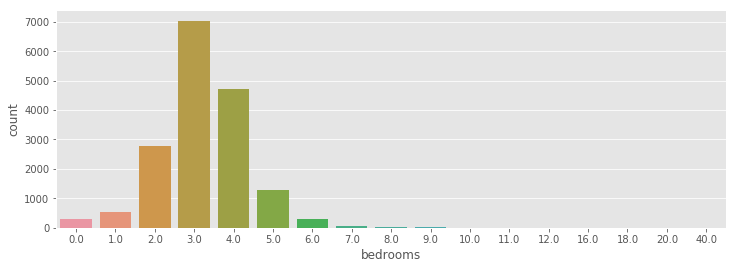

In [141]:
# df['bedrooms'] = pd.to_numeric(df.bedrooms, errors='coerce')
%matplotlib inline

plt.subplots(1,1, figsize=(12,4))
sns.countplot(x='bedrooms', data=df)

plt.savefig("../svg/bedrooms_barplot.svg", format="svg")

>3 Bedrooms is the most common amongst the listings

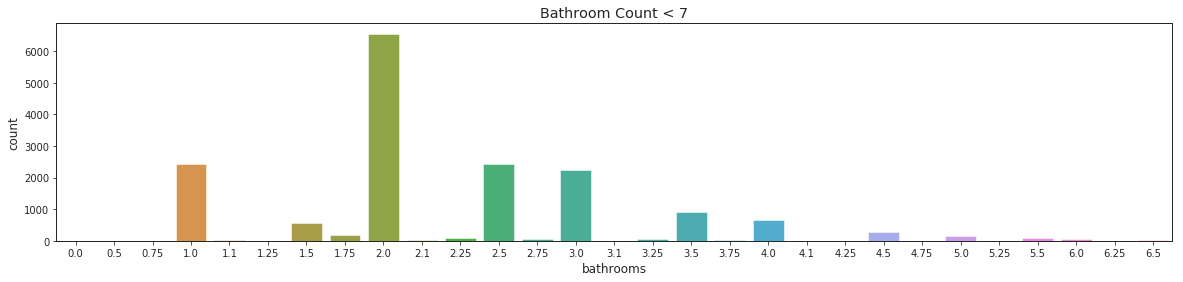

In [142]:
# df['bathrooms'] = pd.to_numeric(df.bathrooms, errors='coerce')

sns.set_style("ticks")
plt.subplots(1,1, figsize=(20,4))
sns.countplot(x='bathrooms', data=df[df.bathrooms <7])
plt.title('Bathroom Count < 7')
plt.savefig("../svg/bathrooms_barplot.svg", format="svg")

>There is a large assortment of bathroom counts, with 2 being the most frequent

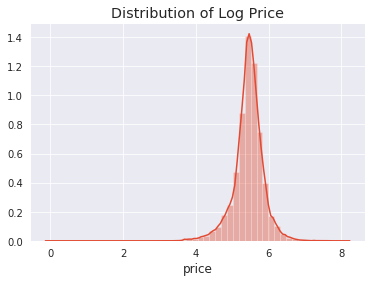

In [143]:
sns.set_style("darkgrid")
sns.distplot(np.log10(df.price[df.price.notnull()]))

plt.title('Distribution of Log Price')

plt.savefig("../svg/log_price_dist.svg", format="svg")

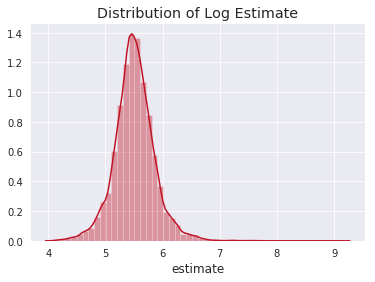

In [144]:
sns.distplot(np.log10(df.estimate[df.estimate.notnull()]), color='#c11426')

plt.title('Distribution of Log Estimate')
plt.savefig("../svg/log_est_dist.svg", format="svg")

## The estimate appears to have a large left skew and the price a right skew
- This is likely due to null and zero price listings.
- perhaps prices tend to be over estimated.

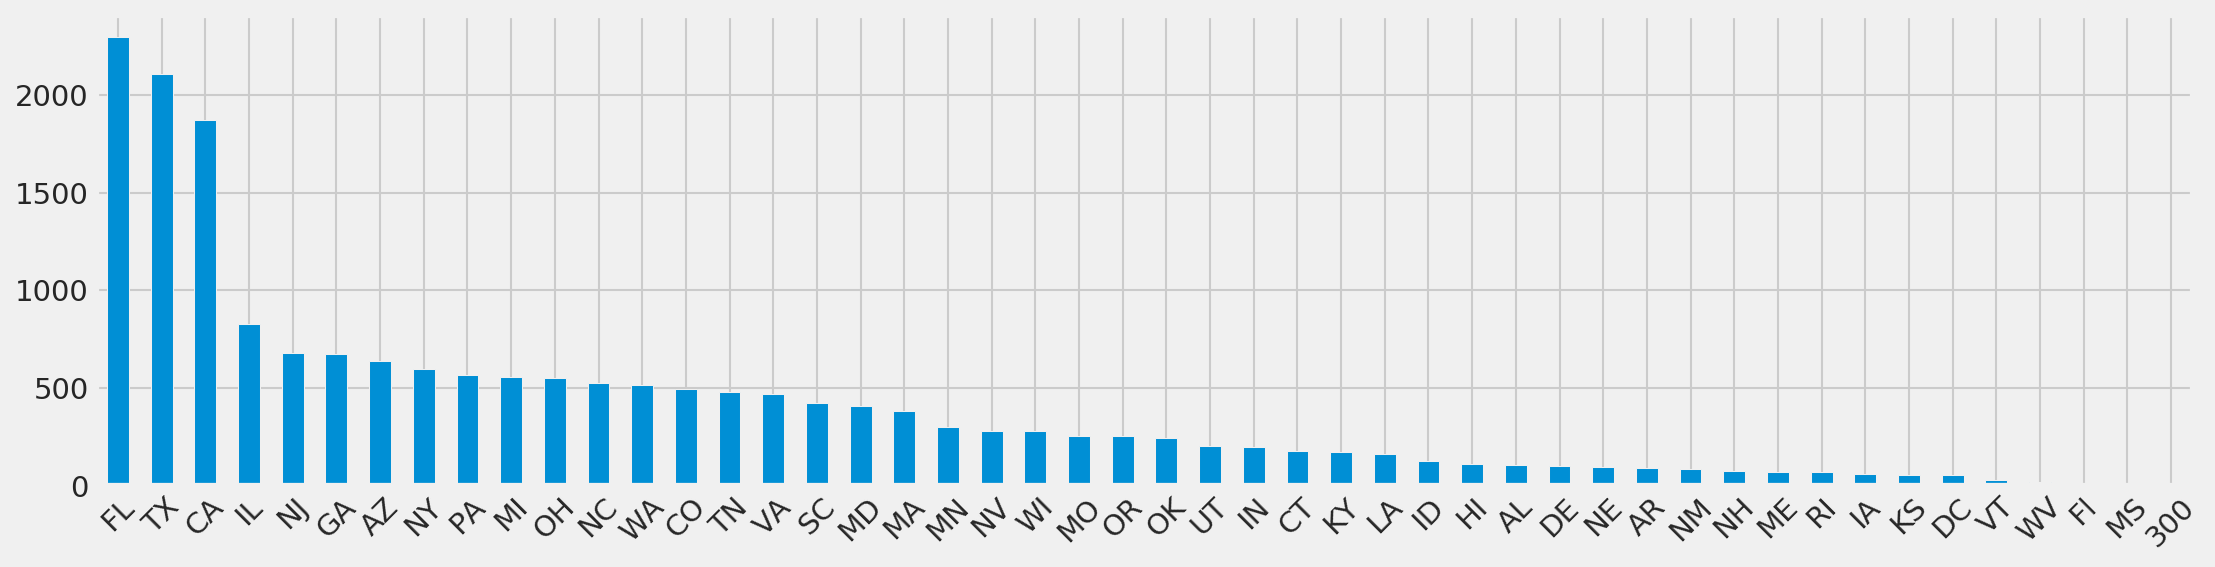

In [145]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,4), dpi=150)

df.state.value_counts().plot.bar()

plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("../svg/states.svg", format="svg")

In [146]:
df['log_price'] = np.log10(df.price)

## Here we can see that homes with a pool and fireplace tend to be more expensive for each of CA, TX, and FL

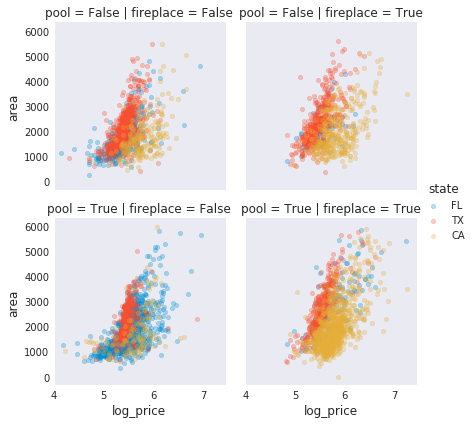

In [147]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('dark')

g = sns.FacetGrid(df[df.state.isin(['CA','TX','FL']) &(df.area<6000)], row='pool', col="fireplace", hue="state",)
g.map(plt.scatter, "log_price", "area", alpha=.3, s=20)
g.add_legend();

plt.savefig("../svg/facet.svg", format="svg")

## These categorical plots show price reflected in several feature combinations

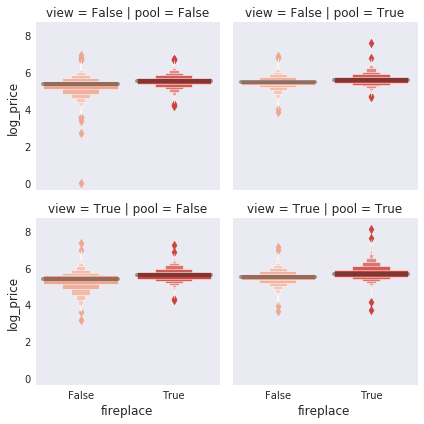

In [148]:
sns.catplot(x="fireplace", y="log_price", 
            col="pool", row="view", kind='boxen',
            data=df, aspect=1, height=3, palette='Reds')

plt.savefig("../svg/features_boxen_fireplace_pool.svg", format="svg")

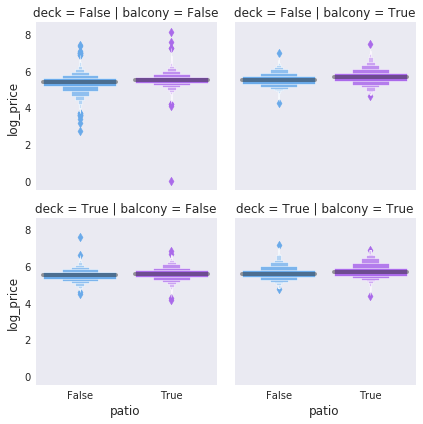

In [149]:
sns.catplot(x="patio", y="log_price", 
            col="balcony", row="deck", kind='boxen',
            data=df, aspect=1, height=3, palette='cool')


plt.savefig("../svg/features_basement_den_patio_deck.svg", format="svg")

## Observe the class imbalance amongst binary features

- Library, Skylight, and hot tub appear to be minimally represented with < 2000 samples

In [150]:
df = df.drop(['MLS','log_price'], 1)

In [151]:
features = df.loc[:,'fireplace':].columns

In [152]:
ff = pd.DataFrame()

for col in features:
    ff[col] = df[col].value_counts()

percent_listings = pd.DataFrame(round(ff.T[True]/(ff.T[True]+ff.T[False]) *100, 2), columns=['% listings']).sort_values(by='% listings')

html = percent_listings.to_html()


## We've parsed 42 features in total 

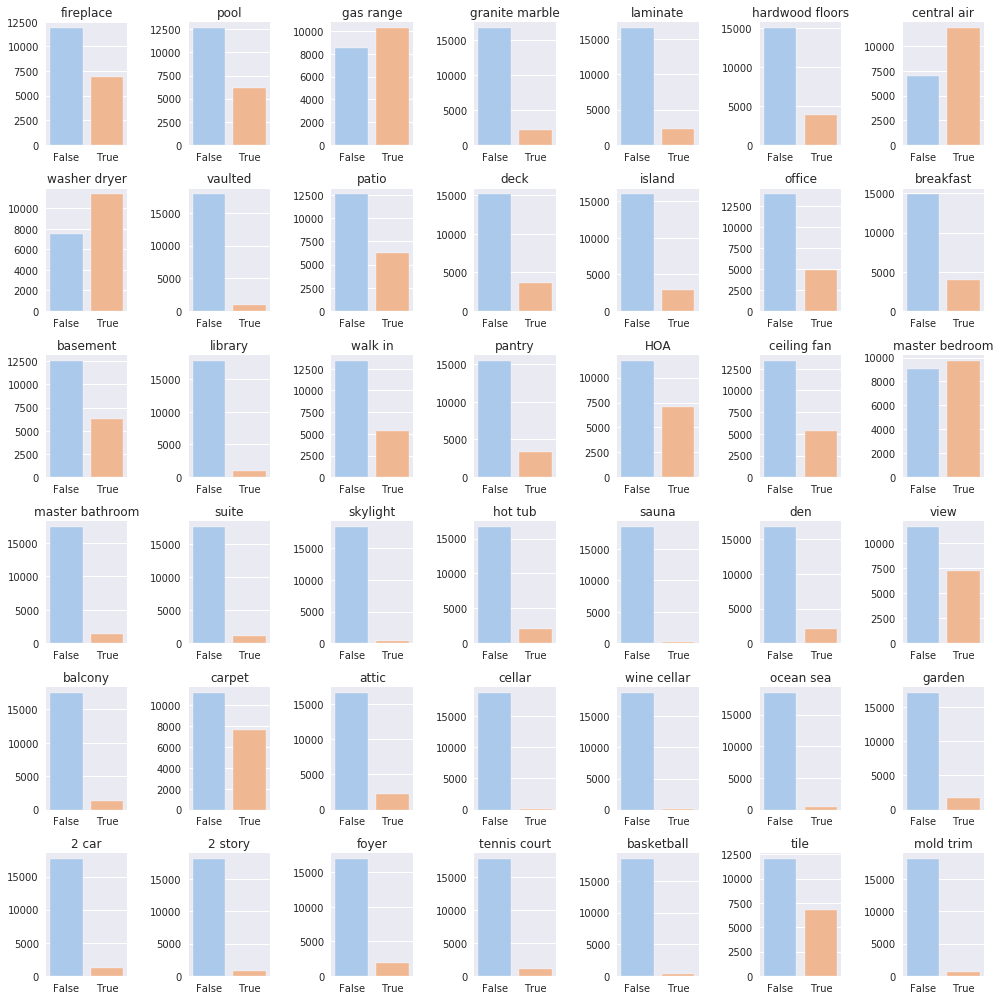

In [153]:
sns.set_style('dark')
plt.style.use('seaborn')
plt.figure(figsize=(14,14))

dim = round(len(features)**.5)
for i, col in enumerate(features):
    plt.subplot(dim,dim+1,i+1)
    sns.countplot(x=col, data=df, palette='pastel')
    plt.title(col.replace('_', ' '))
    plt.ylabel('')
    plt.xlabel('')
    plt.tight_layout()

# plt.savefig("../svg/features_count_plot2.svg", format="svg")

## Wine Cellar is the most sparse real estate listing feature with only 27 instances

In [154]:
sparse = {}
for col in features:
    caseCount = df[col][df[col]==True].count()
    if caseCount < 1000:
        sparse[col] = caseCount
pd.DataFrame(data=list(sparse.values()), 
             index=list(sparse.keys()), 
            columns=['case count'] ).sort_values(by='case count')

,case count
wine_cellar,27
cellar,72
sauna,272
basketball,343
ocean_sea,375
skylight,425
mold_trim,659
2_story,676
vaulted,967
library,975


In [155]:
# long list view dataframe

# pd.DataFrame(df.loc[:,'fireplace':][df.loc[:,'fireplace':] == True].count().sort_values(), 
#              columns=['counts']).T

# The mean is about 21 images per listing

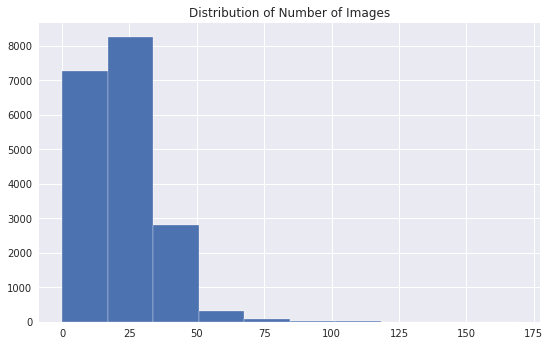

In [156]:
sns.set_style("dark")
df.num_images.hist()

plt.title('Distribution of Number of Images')
plt.savefig("../svg/num_images_dist.svg", format="svg")

## Look at sample listings 

In [157]:
# # Look at sample listings
# [print(x, df['listing'][x]) for x in df['listing'][df.num_images==num_images].index]

In [158]:
df['listing'][df.num_images<=2].count()

2207

## There are approximately 2,207 zero or one image listings

In [159]:
df.num_images.describe()

count    18790.000000
mean        20.853113
std         14.636262
min          0.000000
25%          9.000000
50%         21.000000
75%         30.000000
max        169.000000
Name: num_images, dtype: float64

# Look at listings with images >= 9 (25th %ile)

In [160]:
df.loc[:,:'zipcode'][df.num_images>=9].count()

image          14272
stats          11142
details        11142
info           13979
last_pulled    14272
listing        14272
price          13859
area           11841
num_images     14272
state          14264
address        14271
bedrooms       13820
bathrooms      13762
estimate        8705
status         13324
city           14271
zipcode        14258
dtype: int64

# We have approximately 14,000 listing classes with 9 or more photos

In [161]:
import pandas as pd

cf = pd.DataFrame(data=[8954,15600,19387,19368,15200,19895,19298], 
             index=['Bathroom', 'Dining Room', 'Kitchen', 
                   'Living Room', 'Interior', 'Exterior', 'Bedroom'],
            columns=['class_count'])

In [162]:
cf = cf.sort_values(by='class_count', ascending=False).sort_values(by='class_count', ascending=False)

In [163]:
cf

,class_count
Exterior,19895
Kitchen,19387
Living Room,19368
Bedroom,19298
Dining Room,15600
Interior,15200
Bathroom,8954


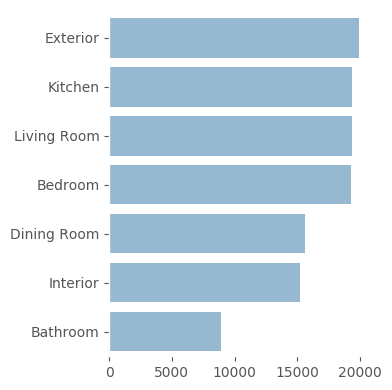

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcdefaults()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(4,4))

ax = sns.barplot(x=cf['class_count'], y=cf.index, 
                 data=cf, color='#8cb9db')
ax.grid(False)

ax.set_xlabel('')
# ax.xaxis.tick_top()
# ax.set_xlabel('Image Class Count')
# ax.xaxis.set_label_position('top') 
ax.set_facecolor('white')
# ax.set_title('Image Class Count')
plt.tight_layout()
plt.savefig("../svg/train_count.svg", format="svg")

In [165]:
cf.sort_values(by='class_count', ascending=False)

,class_count
Exterior,19895
Kitchen,19387
Living Room,19368
Bedroom,19298
Dining Room,15600
Interior,15200
Bathroom,8954


## create horizontal bar chart of T/F ratio for each feature

In [166]:
df = df.loc[:,'fireplace':]

df = df.drop('HOA', 1)

In [167]:
df = df[['fireplace', 'island', 'pool', 'deck', 'patio', 'tile', 'wine_cellar']]

In [168]:
counts = pd.DataFrame((df[df==True]).count()/(df[df==False]).count()).sort_values(by=0, ascending=False)

counts.index = pd.Series(counts.index).str.replace('_', ' ').tolist()

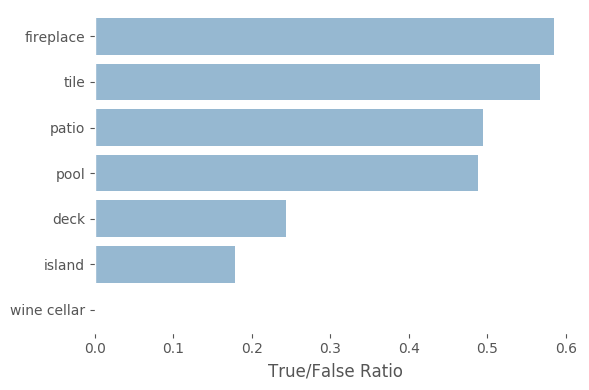

In [169]:
plt.rcdefaults()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(6,4))

ax = sns.barplot(x=counts[0], y=counts.index, data=cf, color='#8cb9db')
ax.grid(False)


ax.set_xlabel('True/False Ratio')
# ax.xaxis.set_label_position('top') 
ax.set_facecolor('white')
# ax.set_title('Real Estate Features')
plt.tight_layout()
plt.savefig("../svg/features_TF.svg", format="svg")

# Get features count

In [94]:
df[df==True].count().sort_values()

wine_cellar           27
cellar                72
sauna                272
basketball           343
ocean_sea            375
skylight             425
mold_trim            659
2_story              676
vaulted              967
library              975
tennis_court        1031
suite               1134
2_car               1169
balcony             1328
master_bathroom     1410
garden              1757
foyer               1909
den                 2021
hot_tub             2117
granite_marble      2127
laminate            2220
attic               2248
island              2847
pantry              3327
deck                3671
hardwood_floors     3795
breakfast           3915
office              4852
ceiling_fan         5347
walk_in             5349
pool                6165
patio               6210
basement            6233
tile                6793
fireplace           6928
HOA                 7076
view                7167
carpet              7624
master_bedroom      9742
gas_range          10247


## Query all listings with a feature

In [178]:
# [print(x) for x in df['listing'][(df['fireplace']==True) & (df['pool']==True) & (df['balcony']==True)]]